## Test des paramètres à 1000 items

In [1]:
from tools.testor import *
import tools.parser as parser
from tools.SadObject import *
import tools.tabou2_solver as tbs
from tools.tabou2_solver import *
from tools.Other_solver import Other_solver
from tools.MyIterator import *


load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\zlib1.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\abseil_dll.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\utf8_validity.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\re2.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\libprotobuf.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\highs.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\ortools.dll...


### Load les fichiers

In [2]:
sad1 = parser.loadFromFile("Data/pi-12-1000-1000-001.kna")
sad2 = parser.loadFromFile("Data/pi-13-1000-1000-001.kna")
sad3 = parser.loadFromFile("Data/pi-15-1000-1000-001.kna")

loading file: 100%|██████████| 1.00k/1.00k [00:00<00:00, 182klines/s]
loading file: 100%|██████████| 1.00k/1.00k [00:00<00:00, 444klines/s]
loading file: 100%|██████████| 1.00k/1.00k [00:00<00:00, 548klines/s]


### Trouver la valeur optimale

In [3]:
solver = Other_solver(sad1)
sol_opti1,_ = solver.solve()

solver = Other_solver(sad2)
sol_opti2,_ = solver.solve()

solver = Other_solver(sad3)
sol_opti3,_ = solver.solve()

print("les solutions optimales sont")
print("sad 1 :",sol_opti1,"pour",sad1.name)
print("sad 2 :",sol_opti2,"pour",sad2.name)
print("sad 3 :",sol_opti3,"pour",sad3.name)

les solutions optimales sont
sad 1 : 4514 pour pi-12-1000-1000-001.kna
sad 2 : 6513 pour pi-13-1000-1000-001.kna
sad 3 : 4950 pour pi-15-1000-1000-001.kna


## Lecture des graphiques :

Le + rouge est la médianne, la moyenne est le point bleu.
Les barres bleues représentent les limites des percentile 80 et 20

### Pour la liste Tabu

Voici les différents paramètres amenés à évoluer :
-    iter_max : Nombre maximum d'itération de la boucle du solver 
-    tabu_size : Taille de la liste tabu
-   overflow_cost : si =1, 1kg en trop == 1 point de fitness en moins, 2 pour 2 etc.
- def_sol_size : rapport entre la capactié du sac à dos et le poids de la solution initiale (0.5, moitié de la capacité)

#### Initialisation des paramètres

In [4]:
iter_max = 3000
tabu_size = 100
overflow_cost = 3.0
init_size = 0.1

group_size = 10 #nombre de tests de chaque paramètres dans une éxecutions.

#### Test taille TABU

calcul: 100%|██████████| 21/21 [00:39<00:00,  1.88s/batch]


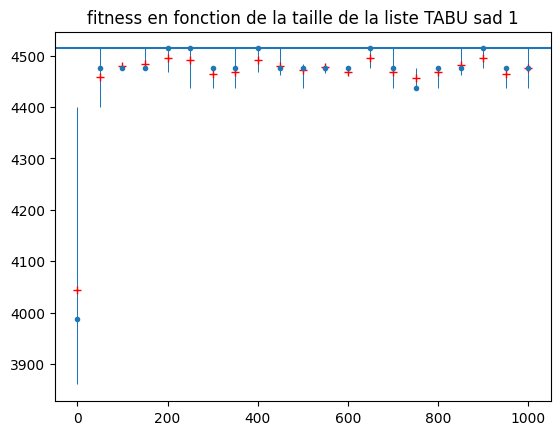

calcul: 100%|██████████| 21/21 [00:40<00:00,  1.95s/batch]


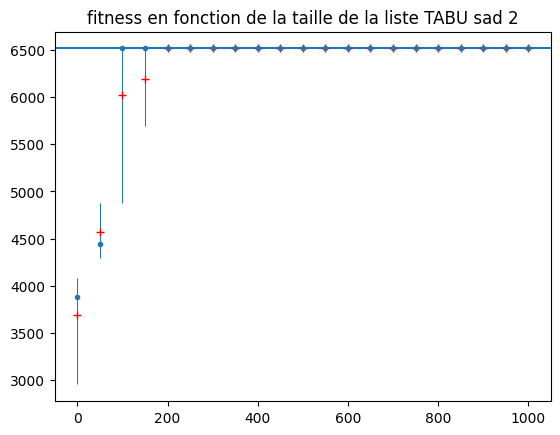

calcul: 100%|██████████| 21/21 [00:32<00:00,  1.56s/batch]


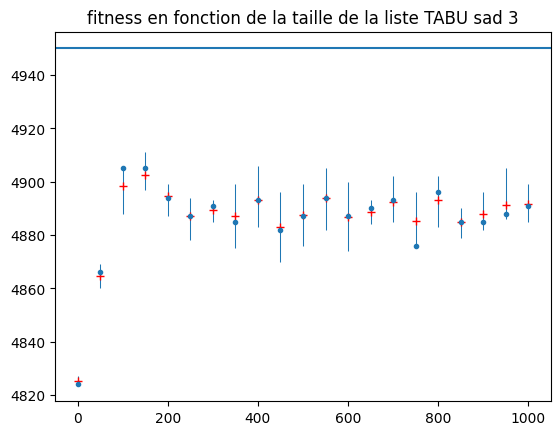

In [5]:
(variateur,title) = variateur_tabou2.liste_tabou2()

test = Testor(tbs.tabou2_solver(sad1,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(range(0,1001,50),variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou2_solver(sad2,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(range(0,1001,50),variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.tabou2_solver(sad3,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(range(0,1001,50),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")

calcul: 100%|██████████| 9/9 [00:38<00:00,  4.28s/batch]


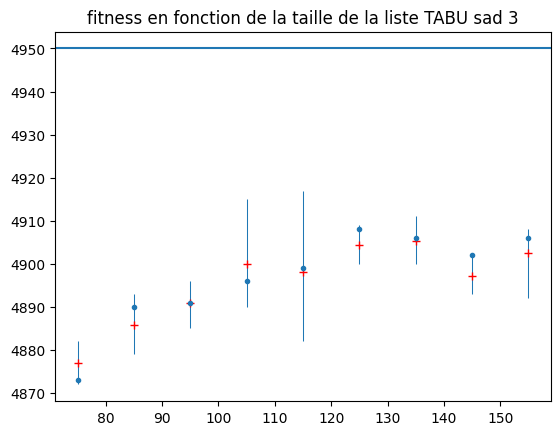

In [6]:
(variateur,title) = variateur_tabou2.liste_tabou2()

test = Testor(tbs.tabou2_solver(sad3,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(range(75,155,10),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


Pour le premier sac à dos : de 0 à 70 non, 70 ou plus, oui, avec des solutions optimale dans autour de 20% des cas, et très proches sinon (4475 sur 4514)

Pour le second : croissance jusqu'à 200, ensuite parfait à partir de 200 inclus.

Pour le troisième : croissance jusqu'à 125 puis plateau (légèrement plus bas) mais on trouves rarement la solution optimale, quoi qu'on en reste proche : 4910 sur 4950

In [7]:
tabu_size_1=  220
tabu_size_2 = 200
tabu_size_3 = 125

calcul: 100%|██████████| 17/17 [00:40<00:00,  2.40s/batch]


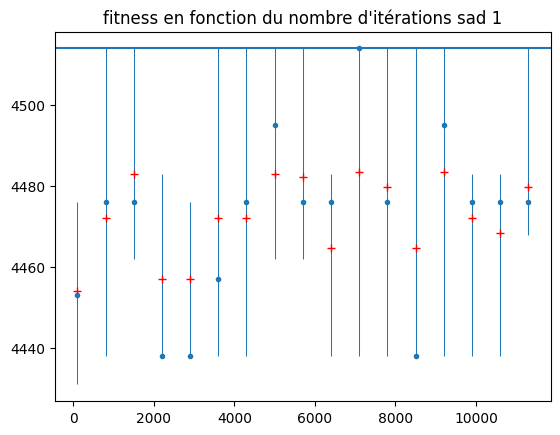

calcul: 100%|██████████| 7/7 [00:11<00:00,  1.62s/batch]


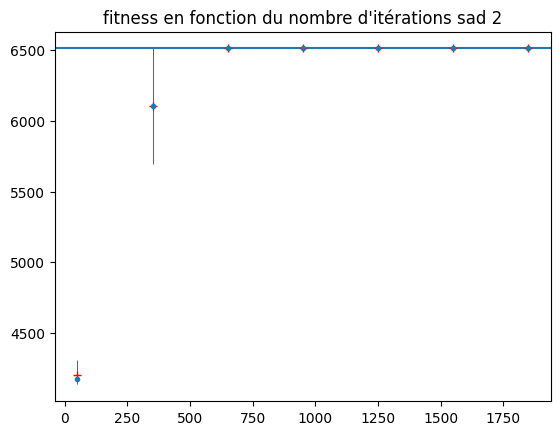

calcul: 100%|██████████| 17/17 [01:04<00:00,  3.78s/batch]


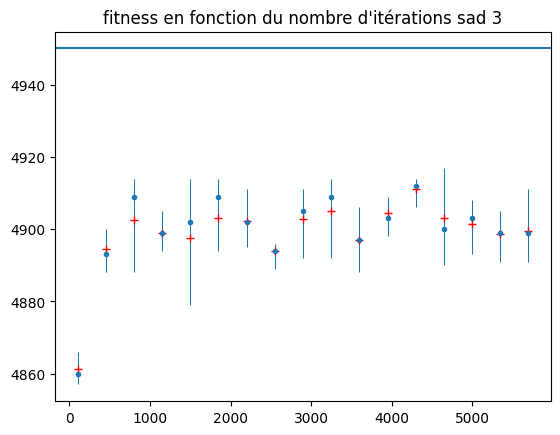

In [8]:
(variateur,title) = variateur_tabou2.nombre_iterations()

solver = tbs.tabou2_solver(sad1,iter_max,tabu_size_1,overflow_cost,init_size)
testResult = Testor(solver).test(range(100,12000,700),variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou2_solver(sad2,iter_max,tabu_size_2,overflow_cost,init_size))
testResult = test.test(range(50,2000,300),variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.tabou2_solver(sad3,iter_max,tabu_size_3,overflow_cost,init_size))
testResult = test.test(range(100,6000,350),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


sad1 : au delà de 1400, ça n'a pas l'air de changer grand chose

sad2 : à partir de 700, c'est litéralement parfait.

sad3 : au delà de 700, le résultat est meilleurs, mais cesse d'évoluer.


## Le comptage négatif du poids supplémentaire

In [9]:
iter_max = 1400 

calcul: 100%|██████████| 16/16 [00:26<00:00,  1.63s/batch]


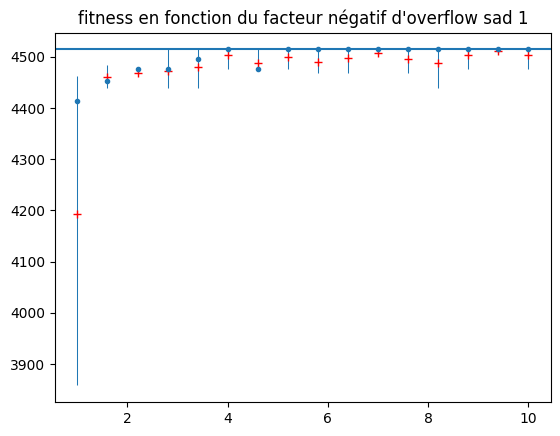

calcul: 100%|██████████| 16/16 [00:30<00:00,  1.93s/batch]


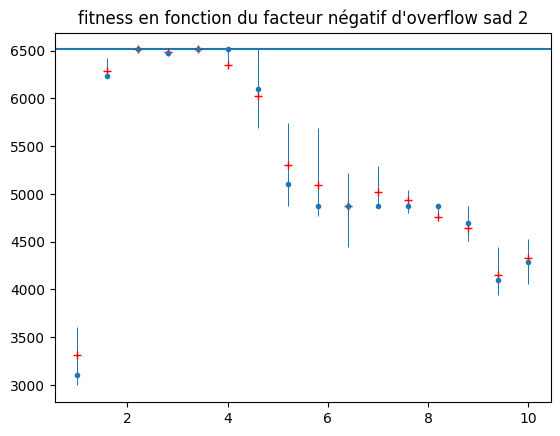

calcul: 100%|██████████| 16/16 [00:33<00:00,  2.12s/batch]


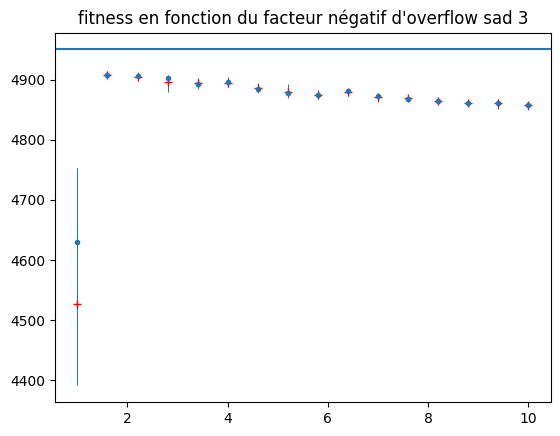

In [10]:
iter = floatRange(1,10,0.6)

(var,titre) = variateur_tabou2.compte_negatif_des_points()

solver = tbs.tabou2_solver(sad1,iter_max,tabu_size_1,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult ,sol_opti1,titre+ " sad 1")

solver = tbs.tabou2_solver(sad2,iter_max,tabu_size_2,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

solver = tbs.tabou2_solver(sad3,iter_max,tabu_size_3,0,init_size)
testResult = Testor(solver).test(iter,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3")



calcul: 100%|██████████| 9/9 [00:12<00:00,  1.41s/batch]


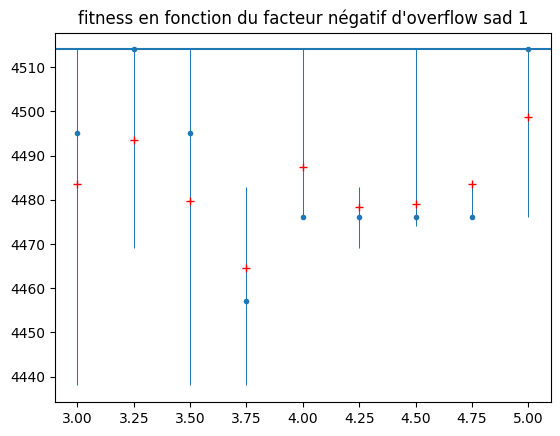

calcul:  89%|████████▉ | 8/9 [00:15<00:01,  1.98s/batch]


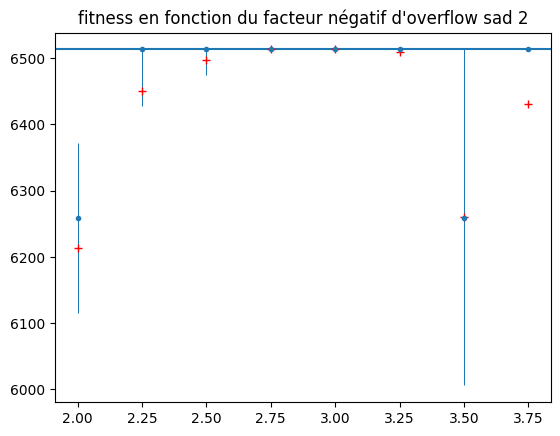

calcul: 100%|██████████| 9/9 [00:19<00:00,  2.15s/batch]


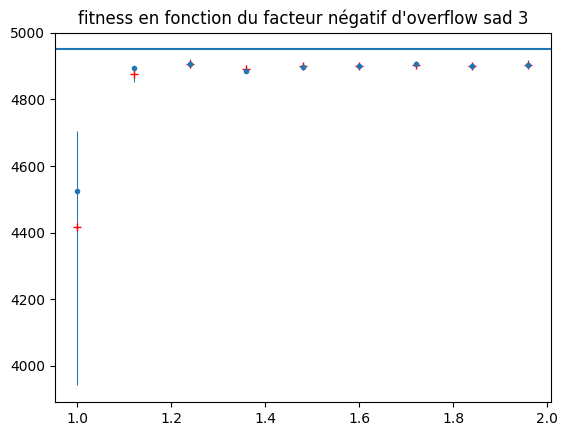

In [12]:
# zoom 
(var,titre) = variateur_tabou2.compte_negatif_des_points()

solver = tbs.tabou2_solver(sad1,iter_max,tabu_size_1,0,init_size)
testResult = Testor(solver).test(floatRange(3,5.1,0.25) ,var,group_size)
graph_test_result(testResult ,sol_opti1,titre+ " sad 1")

solver = tbs.tabou2_solver(sad2,iter_max,tabu_size_2,0,init_size)
testResult = Testor(solver).test(floatRange(2,4,0.25) ,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

solver = tbs.tabou2_solver(sad3,iter_max,tabu_size_2,0,init_size)
testResult = Testor(solver).test(floatRange(1,2,0.12) ,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3")


sad1 : au delà de 2.25 les changements ne sont pas significatifs

sad2 : il faut au moins 2.75 et pas plus de 4.

sad3 : optimal à partir de 1.24 (mais pas parfait) et décroissance régulière à partir de 2.2

à noter : Si le ratio prix/poids des items est trop grande dans le sac à dos, il faut modifier ce paramètre pour qu'il soit aussi grand que ce ratio (à rapporter dans le rapport final)

## variation de la taille de la solution initiale

In [13]:
over_cost1n2 = 2.75
over_cost3 = 1.24

calcul: 100%|██████████| 22/22 [00:30<00:00,  1.37s/batch]


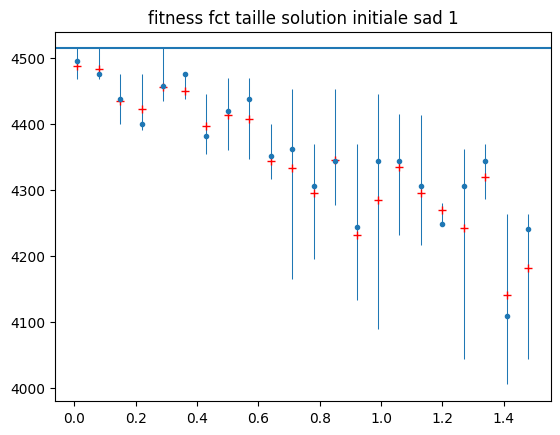

calcul: 100%|██████████| 22/22 [00:39<00:00,  1.80s/batch]


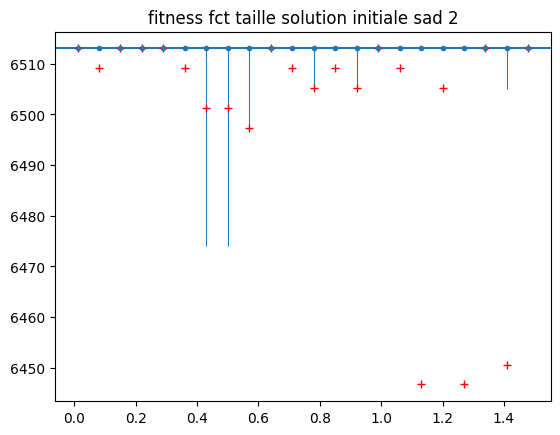

calcul: 100%|██████████| 22/22 [00:42<00:00,  1.95s/batch]


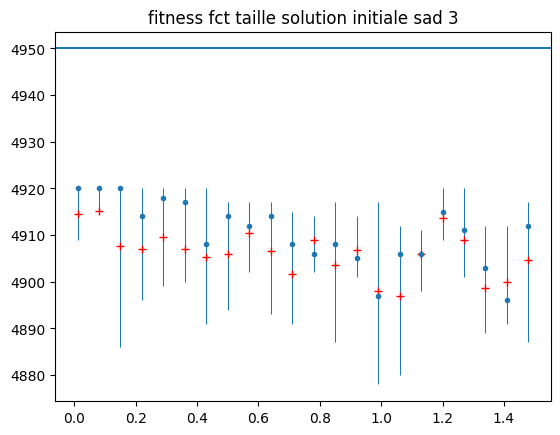

In [ ]:
(variateur,title) = variateur_tabou2.poids_inital()
closeIter = floatRange(0.001,1.5,0.07)
test = Testor(tbs.tabou2_solver(sad1,iter_max,tabu_size_1,over_cost1n2,init_size))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou2_solver(sad2,iter_max,tabu_size_2,over_cost1n2,init_size))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.tabou2_solver(sad3,iter_max,tabu_size_3,over_cost3,init_size))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


pour le premier sac à dos, il vaut mieux garder un sac le plus vide possible (0.01 donne les meilleurs résultats) D'ailleurs, en partant d'une solution vide, on trouves toujours un résultat parfait.

Pour le second, c'est champ libre, ça n'a pas l'air d'empêcher l'algorithme de trouver des valeurs optimales

Pour le troisème, on a une légère décroissance jusqu'à 1, et des valeurs aléatoires après. Le mieux c'est de prendre des valeurs très faibles comme 0.01 ou 0.08.

### Résultats "optimaux"

In [ ]:
overflow_cost = 7.6

iter_max = 2000 

taille_init = 0.01

tabu_size_1n2=  200
tabu_size_3 = 105

In [ ]:
solver1 = tbs.tabou2_solver(sad1,tabu_size_1n2,tabu_size_1,overflow_cost,taille_init)
solver2 = tbs.tabou2_solver(sad2,tabu_size_1n2,tabu_size_2,overflow_cost,taille_init)
solver3 = tbs.tabou2_solver(sad3,tabu_size_3,tabu_size_3,overflow_cost,taille_init)

#TODO : tester le temps que ça prend ?

### Pour le génitif